In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [2]:
df = pd.read_parquet('../../../Data/2022_indicators/coef_no_zeros.parquet')
display(df.head())
print(df.shape)

,coef
CVDSTRK3_2.0,0.830229
GENHLTH_1.0,0.481372
CHCKDNY2_2.0,0.382972
CHCCOPD3_2.0,0.278736
DIABETE4_3.0,0.230772


(48, 1)


In [3]:
df.coef.sum()

-0.36336165291255584

In [29]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults Fair or Poor Health",
    "PERSDOC3_2.0": "1+ Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Daily Drinks",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Days (30 Days)",
    "_BMI5":"BMI", 
    "_DENVST3_1.0": "Visited the Dentist in Past Year",
    "_EXTETH3_1.0": "Adult Had Permanent Teeth Extracted",
    "MEDCOST1_2.0": "Couldn't Pay for Doc in past Year", 
    "LASTDEN4_1.0": "Time Since Last Dentist Visit", 
    "RMVTETH4_8.0": "No Teeth Removed", 
    "RMVTETH4_1.0": "1-5 Teeth Removed",
    "ADDEPEV3_2.0": "No Depressive Disorder",
    "_RACEG22_2.0": "Non-White or Hispanic", 
    "_RACEPR1_2.0": "Race: Black",
    "_IMPRACE_2.0": "Race: Black",
    "_RFBMI5_1.0": "BMI <= 25.00",
    "_METSTAT_2.0" : "Nonmetropolitan", 
    "WEIGHT2": "Weight",
    "_HADSIGM_1.0": "Had Sigmoidoscopy",
    "CHCSCNC1_1.0": "Had Skin Cancer (not Melanoma)",
    "RMVTETH4_2.0": "6+ Teeth Extracted",
    "COVIDPOS_1.0": "Had COVID",
    "LASTDEN4_4.0": "5+ Years Since Dentist",
    "_SMOKGRP_2.0": "Former smoker, 20+ Pack Years, quit < 15 years",
    "_EXTETH3_2.0": "18+ at Risk Has Teeth Extracted",
    "HAVARTH4_1.0": "Has Arthritis",
    "_DRDXAR2_1.0": "Has Arthritis",
    "_RFBMI5_2.0": "BMI > 25.00",
    "SMOKE100_1.0": "Smoked 100+ cigarettes",
    "PRIMINSR_1.0": "Health Insurance Through Employer",
    "BLIND_2.0": "Not Blind",
    "DEAF_2.0": "Not Deaf",
    "SMOKE100_2.0": "Smoked <100 Cigarettes",
    "_SMOKER3_4.0": "Never Smoked",
    "_SMOKGRP_4.0": "Never Smoked",
    "EMPLOY1_8.0": "Unable to Work"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [30]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in df.index]
df.index = mapped_columns
# mapped_columns

In [31]:
df = df.sort_values(by='coef')
df['color'] = 'gray'
df['color'][0:12] = 'salmon'
df['color'][36:] = 'lightgreen'

/tmp/ipykernel_758766/1018619651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'][0:12] = 'salmon'
/tmp/ipykernel_758766/1018619651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'][36:] = 'lightgreen'


In [32]:
df['label'] = df.index
df = df.sort_values(by='coef')
for i in range(12,36):
    df['label'][i] = " " * i
df

/tmp/ipykernel_758766/578176628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][i] = " " * i


,coef,color,label
Male,-0.699378,salmon,Male
Adults with Fair or Poor Health,-0.590869,salmon,Adults with Fair or Poor Health
Age,-0.455082,salmon,Age
More than 1 Personal Heath Provider,-0.440549,salmon,More than 1 Personal Heath Provider
Last Visited Doc in past Year,-0.213256,salmon,Last Visited Doc in past Year
Smoked 100+ cigarettes,-0.192260,salmon,Smoked 100+ cigarettes
Received Pneumococcal Vaccine,-0.183385,salmon,Received Pneumococcal Vaccine
Has Diabetes,-0.166381,salmon,Has Diabetes
Has Arthritis,-0.124265,salmon,Has Arthritis
Has C.O.P.D,-0.104099,salmon,Has C.O.P.D


Text(0.5, 1.0, 'Feature Weights For Cardiovascular Heart Disease: L1 Logistic Regression')

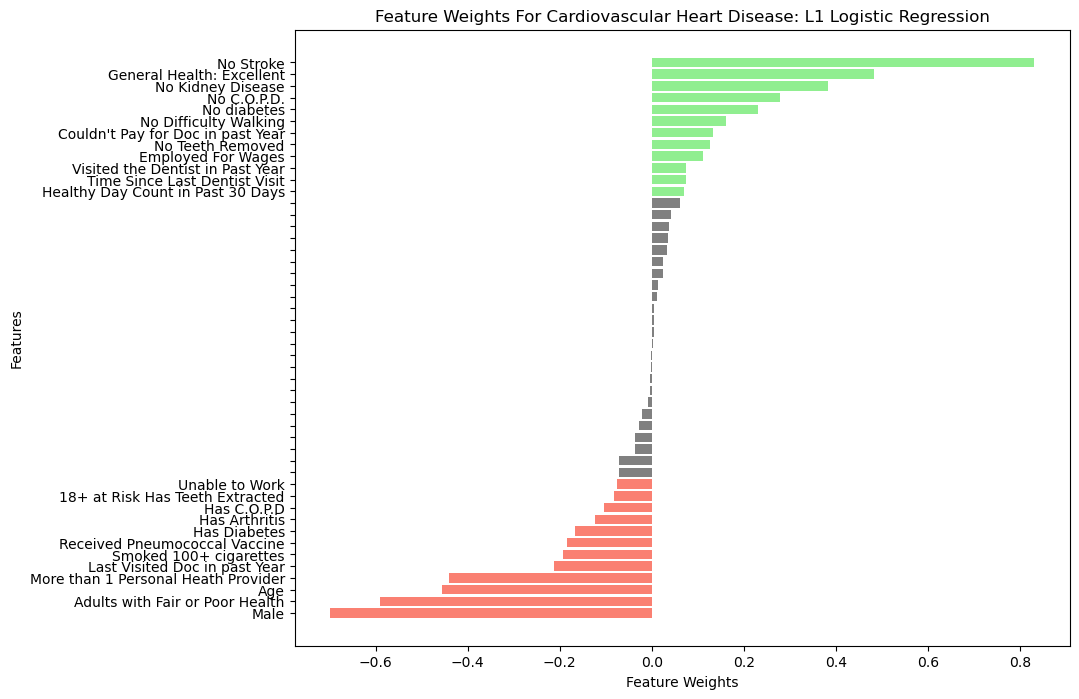

In [33]:
# Create a bar chart with colors and labels
fig, ax = plt.subplots(figsize=(10, 8))
# bars = ax.barh(df.index, df['coef'], color=df['color'])
bars = ax.barh(df['label'], df['coef'], color=df['color'])



# Optional: Add labels and title
ax.set_xlabel('Feature Weights')
ax.set_ylabel('Features')
ax.set_title("Feature Weights For Cardiovascular Heart Disease: L1 Logistic Regression")

In [28]:
list(df.index)[::-1]

['No Stroke',
 'General Health: Excellent',
 'No Kidney Disease',
 'No C.O.P.D.',
 'No diabetes',
 'No Difficulty Walking',
 "Couldn't Pay for Doc in past Year",
 'No Teeth Removed',
 'Employed For Wages',
 'Visited the Dentist in Past Year',
 'Time Since Last Dentist Visit',
 'Healthy Day Count in Past 30 Days',
 '1-5 Teeth Removed',
 'No Depressive Disorder',
 'Race: Black',
 'Female',
 'Non-White or Hispanic',
 'Health Insurance Through Employer',
 'Not Blind',
 'Not Deaf',
 'Drink Occasions Per Day',
 'Never Smoked',
 'Smoked <100 Cigarettes',
 'Never Smoked',
 'BMI <= 25.00',
 'Weight',
 'Had Sigmoidoscopy',
 'Nonmetropolitan',
 'Has Difficulty Walking',
 'Had Skin Cancer (not Melanoma)',
 'BMI',
 'Had COVID',
 '5+ Years Since Dentist',
 'Former smoker, 20+ Pack Years, quit < 15 years',
 'BMI > 25.00',
 'ALCDAY4',
 'Unable to Work',
 '18+ at Risk Has Teeth Extracted',
 'Has C.O.P.D',
 'Has Arthritis',
 'Has Diabetes',
 'Received Pneumococcal Vaccine',
 'Smoked 100+ cigarettes',
 '